<a href="https://colab.research.google.com/github/ashraf9801/midterm/blob/main/QUESTION2_C_Midterm_MV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Upload Datasets from Kaggle


In [2]:
from google.colab import files

# Upload the Kaggle API token
uploaded = files.upload()


Saving kaggle.json to kaggle (1).json


In [3]:
!pip install -q kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                     title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                         DAIGT V2 Train Dataset                      29MB  2023-11-16 01:38:36           3173        260  1.0              
muhammadbinimran/housing-price-prediction-data          Housing Price Prediction Data              763KB  2023-11-21 17:56:32          13271        231  1.0              
thedrcat/daigt-external-train-dataset                   DAIGT External Train Dataset               435MB  2023-11-06 17:10:37            492         55  1.0              
thedrcat/daigt-proper-train-dataset                     DAIGT Proper Train Dataset                 119MB  2023-11-05 14:03:25           2438     

In [8]:
!kaggle datasets download -d 'pranavraikokte/covid19-image-dataset'

 84% 132M/158M [00:00<00:00, 238MB/s]
100% 158M/158M [00:00<00:00, 254MB/s]


In [9]:
import zipfile

In [10]:
dataset_zip = zipfile.ZipFile('covid19-image-dataset.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

## 2. Import Library

In [11]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Getting the Datasets

In [13]:
transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),  #convert to 4D tensor
     transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]     # (Mean)(Standard deviation) Have three point because have three channel
)

train_dir='/content/Covid19-dataset/train'
test_dir='/content/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=transform)


In [14]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=4, shuffle=False)

In [16]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## 4. Build CNN Model

In [18]:
model = models.vgg19_bn(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:06<00:00, 93.0MB/s]


In [19]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [20]:
model.classifier[6] = nn.Linear(in_features = 4096, out_features = 3) # change output according to the number of classes you have

In [21]:
model.to('cuda')

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [22]:
# loss and optimizer

# cross-entropy loss
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [23]:
#Training Loop(Will be used many times)
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [24]:
# Train the model for 10 epochs

num_epochs = 10

myModel, history = train_and_validate(model, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 1.0292, Accuracy: 63.3466%, 
		Validation : Loss : 0.6927, Accuracy: 71.2121%, Time: 14.7995s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.7024, Accuracy: 72.9084%, 
		Validation : Loss : 0.3440, Accuracy: 84.8485%, Time: 13.1422s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.8800, Accuracy: 69.3227%, 
		Validation : Loss : 0.3527, Accuracy: 90.9091%, Time: 15.0450s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.5464, Accuracy: 78.0876%, 
		Validation : Loss : 0.3758, Accuracy: 90.9091%, Time: 12.9358s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.6826, Accuracy: 78.0876%, 
		Validation : Loss : 0.3796, Accuracy: 86.3636%, Time: 13.1834s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.6016, Accuracy: 80.4781%, 
		Validation : Loss : 0.4762, Accuracy: 87.8788%, Time: 13.2346s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.4565, Accuracy: 85.6574%, 
		Validation : Loss : 0.6216, Accuracy: 71.2121%, Time: 13.1379s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.5639, Accura

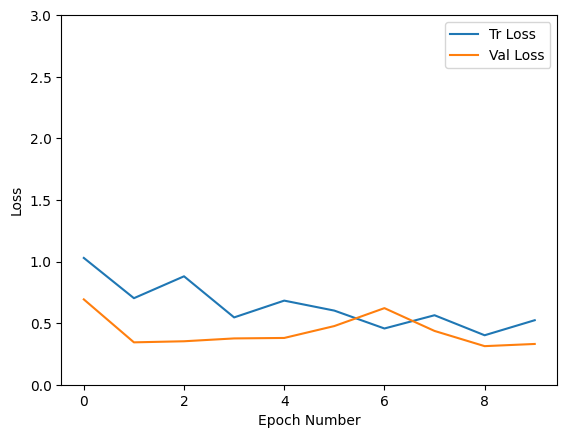

In [25]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

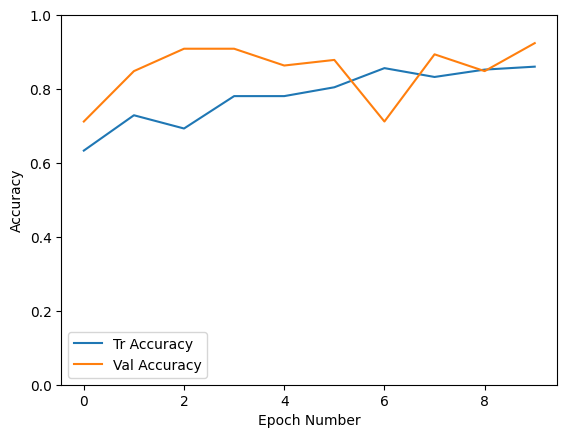

In [26]:
#Analyze the accuracy curve

def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

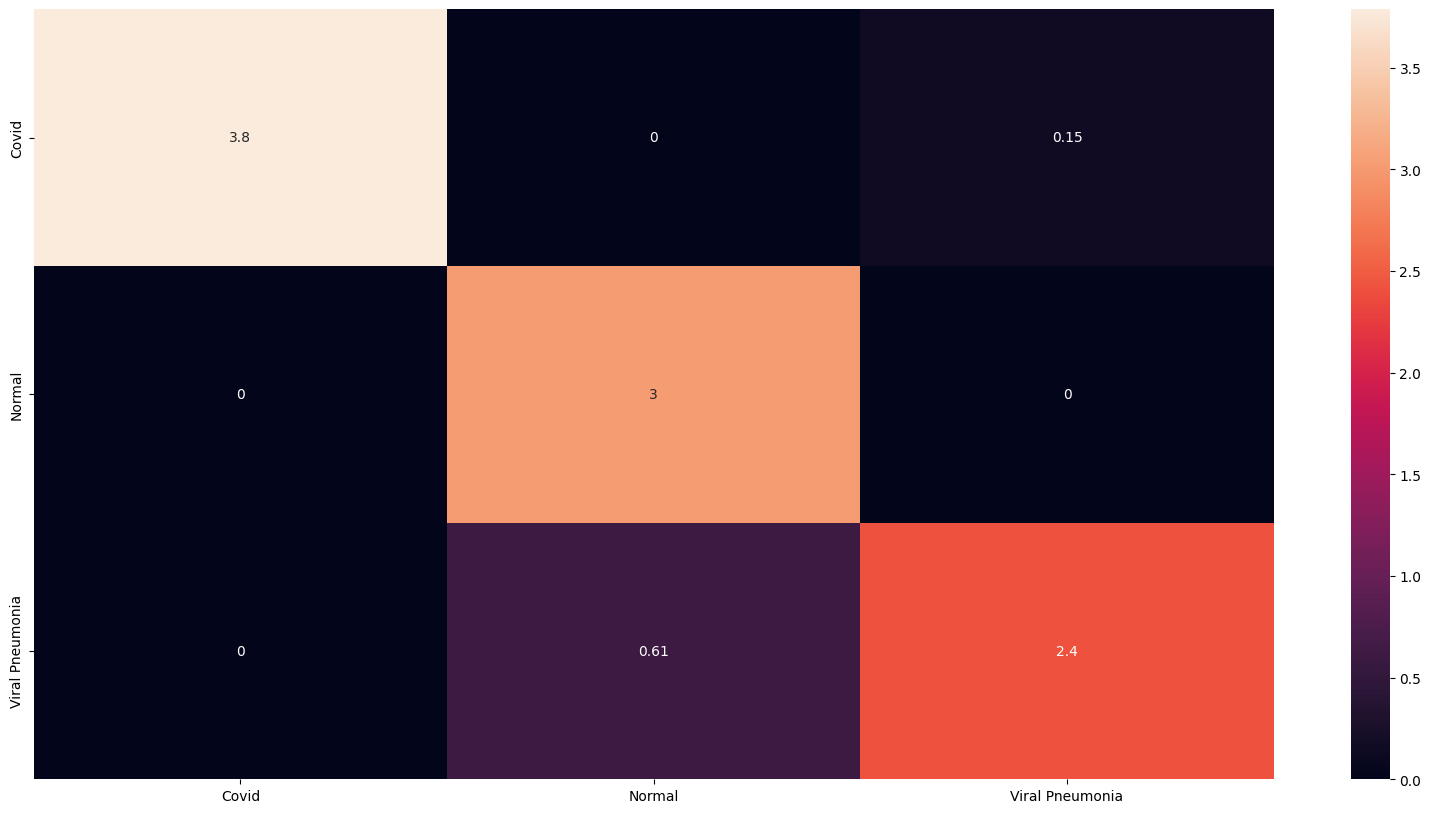

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

def plot_confusionMatrix(model, test_dataloader):

  y_pred = []
  y_true = []

  model.to('cpu')

  # iterate over test data
  for inputs, labels in test_dataloader:
          output = model(inputs) # Feed Network

          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          y_pred.extend(output) # Save Prediction

          labels = labels.data.cpu().numpy()
          y_true.extend(labels) # Save Truth

  # Build confusion matrix
  cf_matrix = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in class_names],
                      columns = [i for i in class_names])
  plt.figure(figsize = (20,10))
  sn.heatmap(df_cm, annot=True)
  # plt.savefig('output.png')

plot_confusionMatrix(myModel, test_dataloader)

In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

def calculate_mean_accuracy(model, test_dataloader):
    y_true = []
    y_pred = []

    # Set the model to evaluation mode
    model.eval()

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    # Calculate accuracy for each class
    class_accuracies = accuracy_score(y_true, y_pred, normalize=False)

    # Calculate mean accuracy
    mean_accuracy = accuracy_score(y_true, y_pred)

    # Output the mean accuracy
    print(f"Mean Accuracy: {mean_accuracy}")

# Assuming you have a PyTorch model 'myModel' and a DataLoader 'test_dataloader'
calculate_mean_accuracy(myModel, test_dataloader)

Mean Accuracy: 0.9242424242424242
